In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from nltk.stem import PorterStemmer
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
import timeit
import time
import matplotlib.pyplot as plt


In [2]:
def get_and_clean_data():
    data = pd.read_csv('../Resource/software_developer_united_states_1971_20191023_1.csv')
    description = data['job_description']
    cleaned_description = description.apply(lambda s: s.translate(str.maketrans('', '', string.punctuation + u'\xa0')))
    cleaned_description = cleaned_description.apply(lambda s: s.lower())
    cleaned_description = cleaned_description.apply(lambda s: s.translate(str.maketrans(string.whitespace, ' ' * len(string.whitespace), '')))
    cleaned_description = cleaned_description.drop_duplicates()
    return cleaned_description

In [13]:

# limit to just 1000 rows
cleaned_description = get_and_clean_data()[:1000]

# replace non alphabeths with spaces, and collapse spaces
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

# tokenize
tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

# remove stop words
stop_dict = set(stopwords.words())
sw_removed_description = tokenized_description.apply(lambda s: set(s) - stop_dict)
# sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])


# create stem caches
concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
stem_cache = {}
ps = PorterStemmer()
for s in concated:
    stem_cache[s] = ps.stem(s)

# stem
stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])

# print(tokenized_description)


cv = CountVectorizer(analyzer=lambda x: x)
vectorizer = cv.fit(stemmed_description)
X = vectorizer.transform(stemmed_description)

XX = X.toarray()
print(np.shape(np.matmul(X.toarray(), X.toarray().T)))
timer1 = timeit.timeit(lambda: np.matmul(XX, XX.T), number=1)
print(timer1)

(1000, 1000)
9.6957602399998


In [14]:

cleaned_description = get_and_clean_data()

# replace non alphabeths with spaces, and collapse spaces
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

# tokenize
tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

# remove stop words
stop_dict = set(stopwords.words())
sw_removed_description = tokenized_description.apply(lambda s: set(s) - stop_dict)
# sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])


# create stem caches
concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
stem_cache = {}
ps = PorterStemmer()
for s in concated:
    stem_cache[s] = ps.stem(s)

# stem
stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])

# print(tokenized_description)


cv = CountVectorizer(analyzer=lambda x: x)
vectorizer = cv.fit(stemmed_description)
X = vectorizer.transform(stemmed_description)

XX = X.toarray()
print(np.shape(np.matmul(X.toarray(), X.toarray().T)))
timer2 = timeit.timeit(lambda: np.matmul(XX, XX.T), number=1)
print(timer2)

(7583, 7583)
1687.1647414629988


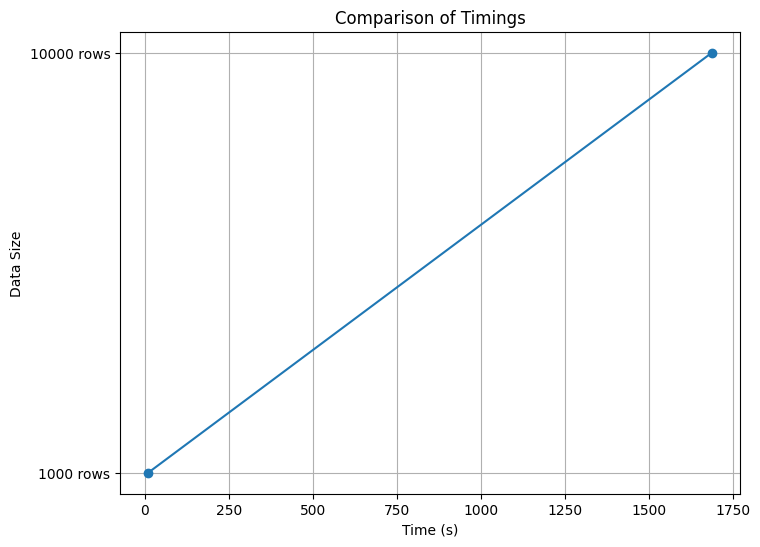

In [19]:

# Create a DataFrame with switched axes
data = {'Time (s)': [timer1, timer2],
        'Data': ['1000 rows', '10000 rows']}
df = pd.DataFrame(data)

# Plotting as a line graph with switched axes
plt.figure(figsize=(8, 6))
plt.plot(df['Time (s)'], df['Data'], marker='o', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Data Size')
plt.title('Comparison of Timings')
plt.grid(True)
plt.show()


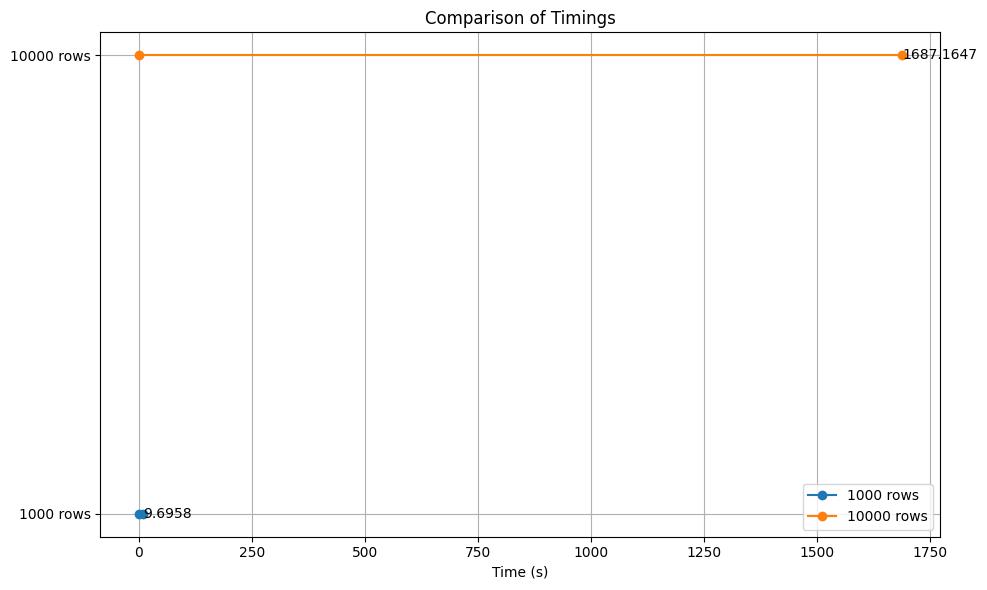

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming timer1 and timer2 are already calculated

# Create a DataFrame with switched axes
data = {'Time (s)': [timer1, timer2],
        'Data': ['1000 rows', '10000 rows']}
df = pd.DataFrame(data)


# Plotting as a line graph with separate lines for each data size
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.plot([0, row['Time (s)']], [index, index], marker='o', linestyle='-', label=row['Data'])

    # Display the result value on each head of the line with some offset
    plt.text(row['Time (s)'] + 0.05, index, f'{row["Time (s)"]:.4f}', ha='left', va='center')

plt.xlabel('Time (s)')
plt.yticks(range(0, len(df)), df['Data'])  # Set y-axis ticks to represent each data size
plt.title('Comparison of Timings')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
